In [1]:
import laspy as lp
import numpy as np
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path
import xarray_leaflet
from ipyleaflet import Map


from optical_group_5.points2dem import dem, classes

In [2]:
DATA = Path("../data")
ds_base = xr.open_dataset(DATA / "relative_height.nc")
rh_base = ds_base.where(ds_base.classes == 5).rh
rh_latest = xr.open_dataarray(DATA / "relative_height_latest.nc")
rh_base = rh_base.rename({"lon": "x", "lat": "y"})
rh_base = rh_base.rio.set_spatial_dims("x", "y")

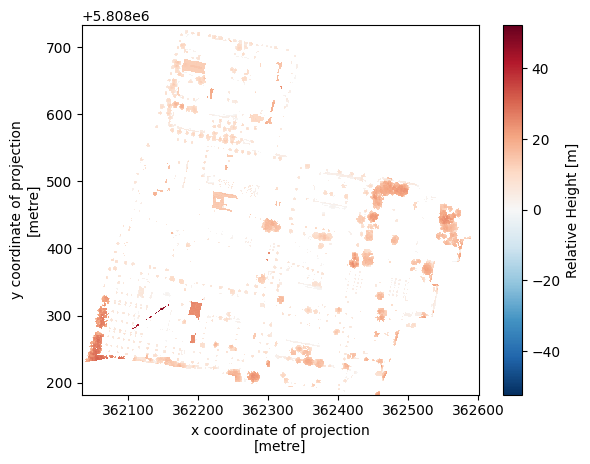

In [3]:
rh_base.plot.imshow()

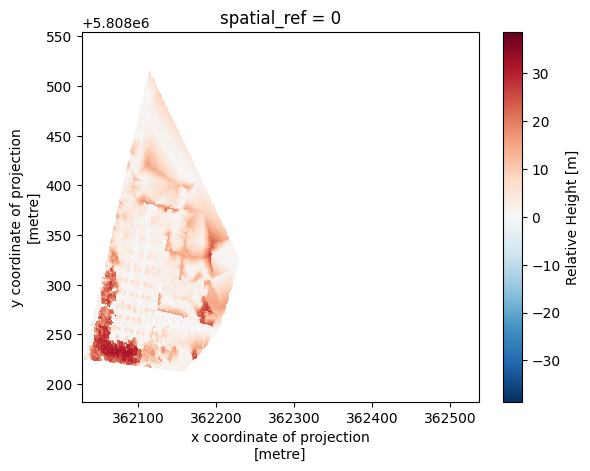

In [4]:
rh_latest.plot.imshow()

In [5]:
rh_change = rh_latest - rh_base.interp_like(rh_latest)
rh_change

<xarray.DataArray (y: 372, x: 509)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x            (x) float64 4kB 3.62e+05 3.62e+05 ... 3.625e+05 3.625e+05
  * y            (y) float64 3kB 5.809e+06 5.809e+06 ... 5.808e+06 5.808e+06
    spatial_ref  int32 4B 0

Text(0.5, 0, 'Longitude (x of EPSG:32633) [m]')

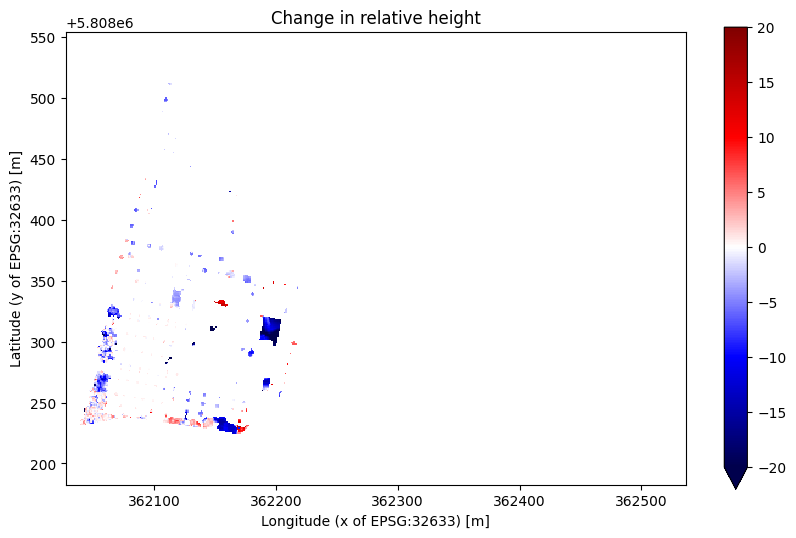

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
rh_change.plot.pcolormesh(ax=ax, cmap="seismic", vmin=-20, vmax=20)
ax.set_aspect("equal")
ax.set_title("Change in relative height")
ax.set_ylabel("Latitude (y of EPSG:32633) [m]")
ax.set_xlabel("Longitude (x of EPSG:32633) [m]")

In [7]:
rh_change.rio.to_raster(DATA / "relative_height_change.tif")

mean: 0.33m max: 3.00m


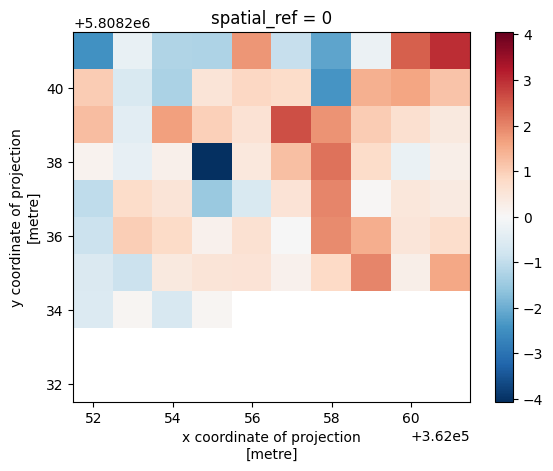

In [43]:
lat = 5808236.76
lon = 362056.23
r = 5

rh_change_biggest_tree = rh_change.sel(x=slice(lon-r, lon+r), y=slice(lat+r, lat-r))
print(f"mean: {rh_change_biggest_tree.mean().values:.2f}m max: {rh_change_biggest_tree.max().values:.2f}m")
rh_change.sel(x=slice(lon-r, lon+r), y=slice(lat+r, lat-r)).plot.imshow()